In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV, ShuffleSplit, cross_val_predict, cross_val_score, train_test_split
from sklearn.metrics import f1_score, mean_squared_error, ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.compose import ColumnTransformer

In [3]:
data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [5]:
data.describe()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,OS,SearchEngine,Zone,Type of Traffic,WeekendPurchase
count,14578.000000,14581.000000,14578.000000,14596.000000,14608.000000,14564.000000,14580.000000,14602.000000,14599.000000,14581.000000,14597.000000,14609.000000,14614.000000,14588.000000,14610.000000
mean,2.250240,79.300762,0.490739,33.455943,31.559488,1184.346084,0.023366,0.044664,4.812620,0.064083,2.122422,2.356629,3.155673,4.090143,0.234155
std,3.288042,179.374699,1.252376,140.146256,44.897089,2009.496307,0.050011,0.049912,16.887366,0.202583,0.914404,1.721823,2.405155,4.040147,0.423484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,173.187500,0.000000,0.014502,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,17.500000,584.333333,0.003478,0.026406,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,91.000000,0.000000,0.000000,38.000000,1434.255128,0.018182,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000,1.000000


In [6]:
# ros = ClusterCentroids(random_state=0)
# x_ros, y_ros = ros.fit_resample(data.drop(columns=['SeasonalPurchase','OS',
#                                  'SearchEngine', 'Zone', 'Type of Traffic','CustomerType','Gender','Education',
#                                   'Marital Status', 'WeekendPurchase','Cookies Setting']), data.drop(columns=['Made_Purchase']))

<AxesSubplot:>

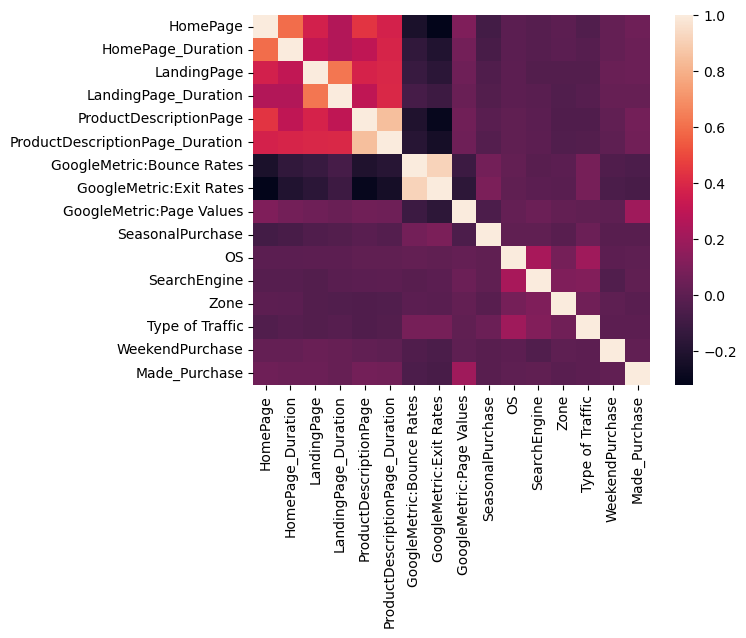

In [7]:
corr = data.corr()
sns.heatmap(corr)

In [8]:
# data['Education'].replace(to_replace=['Not Specified', 'Others', 'Diploma', 'Graduate', np.nan], value=[0, 1, 2, 3, 0], inplace=True)
# data['Gender'].replace(to_replace=['Not Specified', 'Female','Male', np.nan], value=[0, 1, 2, 0], inplace=True)
# data['Marital Status'].replace(to_replace=['Other', 'Married', 'Single', 0], value=[3, 2, 1, 0], inplace=True)
# data['CustomerType'].replace(to_replace=['Returning_Visitor', 'New_Visitor', 'Other', 0], value=[1, 2, 3, 0], inplace=True)
# data['Month_SeasonalPurchase'].replace(to_replace=[0,'Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
#        'Dec'], value=[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
# data['Made_Purchase'].replace(to_replace=['True', 'Flase'], value=[1, 0], inplace=True)

In [9]:
# test['Education'].replace(to_replace=['Not Specified', 'Others', 'Diploma', 'Graduate', np.nan], value=[0, 1, 2, 3, 0], inplace=True)
# test['Gender'].replace(to_replace=['Not Specified', 'Female','Male', np.nan], value=[0, 1, 2, 0], inplace=True)
# test['Marital Status'].replace(to_replace=['Other', 'Married', 'Single', 0], value=[3, 2, 1, 0], inplace=True)
# test['CustomerType'].replace(to_replace=['Returning_Visitor', 'New_Visitor', 'Other', 0], value=[1, 2, 3, 0], inplace=True)
# test['Month_SeasonalPurchase'].replace(to_replace=[0,'Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov',
#        'Dec'], value=[1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)

In [10]:
# temp = data.drop(columns=['SeasonalPurchase','OS',
#                                  'SearchEngine', 'Zone', 'Type of Traffic','CustomerType','Gender','Education',
#                                   'Marital Status', 'WeekendPurchase','Cookies Setting','Made_Purchase'])
# temp_test = test.drop(columns=['SeasonalPurchase','OS',
#                                  'SearchEngine', 'Zone', 'Type of Traffic','CustomerType','Gender','Education',
#                                   'Marital Status', 'WeekendPurchase','Cookies Setting',])

In [11]:
temp = data.drop(columns=['SeasonalPurchase','OS',
                                 'SearchEngine', 'Zone', 'Type of Traffic','CustomerType','Gender','Education',
                                  'Marital Status', 'WeekendPurchase','Cookies Setting','Made_Purchase'])
temp_test = test.drop(columns=['SeasonalPurchase','OS',
                                 'SearchEngine', 'Zone', 'Type of Traffic','CustomerType','Gender','Education',
                                  'Marital Status', 'WeekendPurchase','Cookies Setting'])

In [12]:
cat_pipe = Pipeline([('cat_impute', SimpleImputer(strategy='most_frequent')),
                         ('cat_encode', OneHotEncoder(handle_unknown='ignore'))])

num_pipe = Pipeline([('num_impute', SimpleImputer()),
                    ('num_scale', StandardScaler())])

In [13]:
transform = ColumnTransformer([('cat_transformer', cat_pipe, ['Month_SeasonalPurchase']),
                              ('num_transformer', num_pipe, ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
                                 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates',
                                 'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values'])])

In [14]:
# transform = ColumnTransformer([('cat_transformer', cat_pipe, ['Month_SeasonalPurchase','CustomerType','Gender','Education',
#                                   'Marital Status','Cookies Setting']),
#                               ('num_transformer', num_pipe, ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration',
#                                  'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates',
#                                  'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values', 'SeasonalPurchase','OS',
#                                  'SearchEngine', 'Zone','WeekendPurchase',])])

In [15]:
data_transformed = transform.fit_transform(temp)
test_transformed = transform.fit_transform(temp_test)

In [16]:
data_transformed.shape

(14731, 19)

In [17]:
y_encoding = LabelEncoder()

In [18]:
data['Made_Purchase'].value_counts()

False    9065
True     5666
Name: Made_Purchase, dtype: int64

In [19]:
X =  data_transformed
test_X = test_transformed
y = y_encoding.fit_transform(data['Made_Purchase'])
print('0: ', y.tolist().count(0))
print('1: ', y.tolist().count(1))

0:  9065
1:  5666


In [20]:
# ros = RandomOverSampler(sampling_strategy=1)
# x_ros, y_ros = ros.fit_resample(X, y)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
# y_ros.value_counts().plot.pie(autopct='%.2f').set_title('Over sampling')

In [87]:
# model6 = SVC(C=0.16326530612244897, coef0=0, degree=1, kernel='poly', gamma=0.5928571428571429)

In [88]:
# model7 = knn(n_neighbors=3)

In [79]:
model8 = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=4), 
                           learning_rate=0.2)

In [ ]:
# feature_selector = sfs(model6, direction="forward", cv=5)
# feature_selector.fit_transform(X, y)

In [ ]:
# feature_selector.get_feature_names_out()

array(['HomePage', 'HomePage_Duration', 'LandingPage',
       'LandingPage_Duration', 'ProductDescriptionPage',
       'ProductDescriptionPage_Duration', 'GoogleMetric:Bounce Rates',
       'GoogleMetric:Exit Rates', 'GoogleMetric:Page Values',
       'Month_SeasonalPurchase'], dtype=object)
       
       
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10]

In [ ]:
# feature_selector.get_support(indices=True)

In [ ]:
# cv_model6 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
# cross_val = cross_validate(model6, X_train, y_train, cv=cv_model6)

In [ ]:
# model6_res = learning_curve(
#  model6, X_train, y_train, cv=cv_model6,
#  scoring="neg_mean_absolute_error")

# train_size6, train_scores6, test_scores6 = model6_res[:3]
# # Convert the scores into errors
# train_errors6, test_errors6 = -train_scores6, -test_scores6

In [ ]:
# print('Model 6 Scores: ', train_errors6.mean(), ' ', test_errors6.mean())

In [ ]:
# def plot_learning_curves(model, X, y):
#   scaler = MinMaxScaler() 
#   X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
#   X_train_norm = scaler.fit_transform(X_train)
#   X_val_norm = scaler.transform(X_val)
#   train_errors, val_errors = [], []
#   for m in range(20,len(X_train_norm),1000):
#     model.fit(X_train_norm[:m], y_train[:m])
#     y_train_predict = model.predict(X_train_norm[:m])
#     y_val_predict = model.predict(X_val_norm)
#     train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
#     val_errors.append(mean_squared_error(y_val, y_val_predict))

#   plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
#   plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
#   plt.xlabel('Train set size', fontsize = 22)
#   plt.ylabel('RMSE', fontsize = 22)
#   plt.legend()
#   print('Train Erros', train_errors)

In [ ]:
#plot_learning_curves(model6, x_ros, y_ros)

In [ ]:
# SVC_param = dict( 
#                  C=np.logspace(0.01, 1))
# SVC_grid_search = RandomizedSearchCV(model6, SVC_param, cv=5)

In [ ]:
# SVC_grid_search.fit(X_train, y_train)

In [ ]:
# SVC_grid_search.best_params_

In [ ]:
# {'gamma': 10.693877551020408}

In [ ]:
# model6.fit(X_train, y_train)
# pred_model6 = model6.predict(test_X)

In [ ]:
# pred_model6_x_test = model6.predict(X_test)

In [ ]:
# model7.fit(X_train, y_train)
# pred_model7 = model7.predict(X_test)

In [40]:
# voting = VotingClassifier(estimators=[('svc', model6), ('knn', model7)])

In [41]:
# voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(C=50, coef0=0, degree=1,
                                  gamma=37.55102040816327, kernel='poly')),
                             ('knn', KNeighborsClassifier(n_neighbors=3))])

In [42]:
# voting_predict= voting.predict(X_test)

In [38]:
# voting_predict_test_X = voting.predict(test_X)

In [80]:
model8.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         min_samples_leaf=4,
                                                         min_samples_split=5),
                   learning_rate=0.2)

In [81]:
model8_pred=model8.predict(X_test)

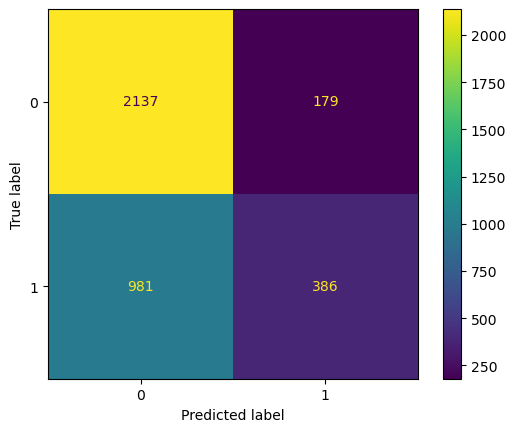

In [82]:
cm = confusion_matrix(y_test, model8_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [83]:
accuracy_score(y_test, model8_pred)

0.6850393700787402

In [85]:
model8_test_X = model8.predict(test_X)

In [86]:
submission = pd.DataFrame(columns=['id', 'Made_Purchase'])
submission['id'] = [i for i in range(len(model8_test_X))]
submission['Made_Purchase'] = model8_test_X
submission = submission.replace(to_replace=[0.0, 1.0], value=['False', 'True'])
submission['id'][0] = 0
submission['id'][1] = 1
submission.to_csv('submission.csv', index=False)
submission.head()
submission['Made_Purchase'].value_counts()

False    5620
True      979
Name: Made_Purchase, dtype: int64